# Data Pre Processing

In [1]:
import numpy as np
import tensorflow as tf

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('dataset')

print (dataset_path)  #what kinds of classes are in this dataset

print("Types of classes labels found: ", len(dataset_path))

['ai', 'real']
Types of classes labels found:  2


In [2]:
class_labels = []

for item in dataset_path:
 # Get all the file names
 all_classes = os.listdir('dataset' + '/' +item)
 #print(all_classes)

 # Add them to the list
 for room in all_classes:
    class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))
    #print(class_labels[:5])

In [3]:

# Build a dataframe        
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

  Labels                         image
0     ai  dataset_path/ai/img(100).jpg
1     ai  dataset_path/ai/img(101).jpg
2     ai  dataset_path/ai/img(102).jpg
3     ai  dataset_path/ai/img(103).jpg
4     ai  dataset_path/ai/img(104).jpg
    Labels                           image
962   real  dataset_path/real/img (95).jpg
963   real  dataset_path/real/img (96).jpg
964   real  dataset_path/real/img (97).jpg
965   real  dataset_path/real/img (98).jpg
966   real  dataset_path/real/img (99).jpg


In [4]:
# Let's check how many samples for each category are present
print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  967
Labels
real    487
ai      480
Name: count, dtype: int64


In [5]:
import cv2
path = 'dataset/'
dataset_path = os.listdir('dataset')

im_size = 224

images = []
labels = []

# Keep track of problematic files
skipped_files = []

for i in dataset_path:
    data_path = path + str(i)  
    filenames = [i for i in os.listdir(data_path)]
   
    for f in filenames:
        try:
            img = cv2.imread(data_path + '/' + f)
            
            # Check if image was loaded successfully
            if img is None:
                print(f"Warning: Could not read image file: {data_path}/{f}")
                skipped_files.append(f"{data_path}/{f}")
                continue
                
            img = cv2.resize(img, (im_size, im_size))
            images.append(img)
            labels.append(i)
        except Exception as e:
            print(f"Error processing {data_path}/{f}: {e}")
            skipped_files.append(f"{data_path}/{f}")

print(f"Total images successfully loaded: {len(images)}")
print(f"Total images skipped due to errors: {len(skipped_files)}")

if skipped_files:
    print("First 10 skipped files:")
    for i, file in enumerate(skipped_files[:10]):
        print(f"  {i+1}. {file}")

Total images successfully loaded: 967
Total images skipped due to errors: 0


In [6]:

#This model takes input images of shape (224, 224, 3), and the input data should range [0, 255]. 

images = np.array(images)

images = images.astype('float32') / 255.0
images.shape

(967, 224, 224, 3)

In [7]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df['Labels'].values
print(y)

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

['ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai'
 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai'
 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai'
 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai'
 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai'
 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai'
 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai'
 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai'
 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai'
 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai'
 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai'
 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai'
 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai'
 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai'
 'ai' 

In [8]:

y=y.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y) #.toarray()
print(Y[:5])
print(Y[35:])

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [9]:
# Modified train/validation/test split with stratification
from sklearn.model_selection import train_test_split

# First split: training vs (validation+test) - with stratification
train_x, val_x, train_y, val_y = train_test_split(
    images, Y, 
    test_size=0.2, 
    random_state=415,
    stratify=np.argmax(Y, axis=1)  # Ensure class balance in splits
)

# Second split: validation vs test - with stratification
val_x, test_x, val_y, test_y = train_test_split(
    val_x, val_y, 
    test_size=0.25, 
    random_state=415,
    stratify=np.argmax(val_y, axis=1)  # Ensure class balance in splits
)

# Check the sizes
print(f"Training set: {train_x.shape}, {train_y.shape}")
print(f"Validation set: {val_x.shape}, {val_y.shape}")
print(f"Test set: {test_x.shape}, {test_y.shape}")

# Check class distribution in each split
print("\nClass distribution in training set:")
print(np.unique(np.argmax(train_y, axis=1), return_counts=True))
print("\nClass distribution in validation set:")
print(np.unique(np.argmax(val_y, axis=1), return_counts=True))
print("\nClass distribution in test set:")
print(np.unique(np.argmax(test_y, axis=1), return_counts=True))

Training set: (773, 224, 224, 3), (773, 2)
Validation set: (145, 224, 224, 3), (145, 2)
Test set: (49, 224, 224, 3), (49, 2)

Class distribution in training set:
(array([0, 1], dtype=int64), array([384, 389], dtype=int64))

Class distribution in validation set:
(array([0, 1], dtype=int64), array([72, 73], dtype=int64))

Class distribution in test set:
(array([0, 1], dtype=int64), array([24, 25], dtype=int64))


In [10]:
# from sklearn.utils import shuffle
# from sklearn.model_selection import train_test_split


# images, Y = shuffle(images, Y, random_state=1)


# train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.05, random_state=415)

# #inpect the shape of the training and testing.
# print(train_x.shape)
# print(train_y.shape)
# print(test_x.shape)
# print(test_y.shape)



In [11]:
# Create a data generator with augmentation for the training data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    fill_mode='nearest'
)

# Fit the generator on the training data
datagen.fit(train_x)


# EfficientNet Implementation :



In [12]:
from tensorflow.keras import layers, regularizers
from tensorflow.keras.applications import EfficientNetB0

NUM_CLASSES = 2
IMG_SIZE = 224
size = (IMG_SIZE, IMG_SIZE)

# Include data augmentation in the model
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.1),
])

# Define model input
inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

# Using pretrained weights initialization
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Freeze most base model layers but unfreeze the last few
for layer in base_model.layers[:-20]:  # Unfreeze more layers
    layer.trainable = False

# Add dropout and regularization
x = data_augmentation(inputs)  # Apply augmentation directly in the model
x = base_model(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(512, activation='relu')(x)  # Larger intermediate layer
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(NUM_CLASSES, activation='softmax')(x)

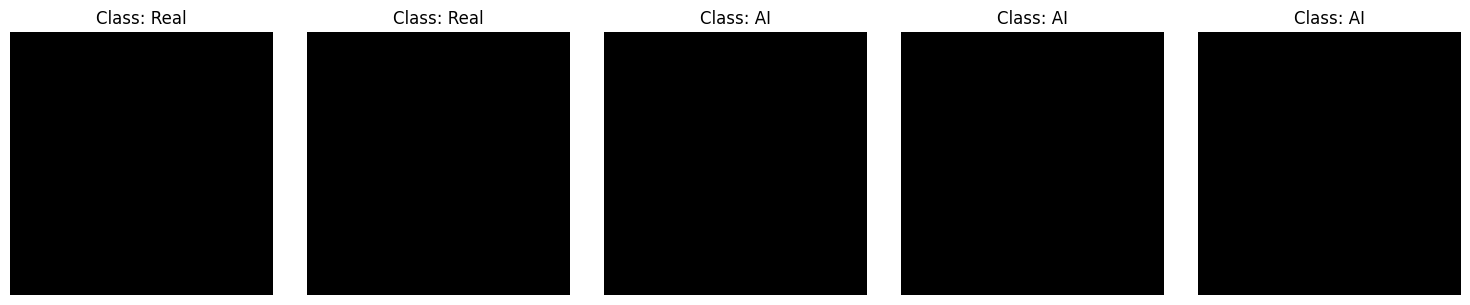

In [13]:
# Create data generators for augmentation during training
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Advanced augmentation for training data
train_datagen = ImageDataGenerator(
    # Geometric transformations
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    
    # Color/intensity adjustments
    brightness_range=[0.8, 1.2],
    channel_shift_range=0.1,
    fill_mode='nearest'
)

# No augmentation for validation/test data
valid_datagen = ImageDataGenerator()

# Create generators
train_generator = train_datagen.flow(
    train_x, train_y,
    batch_size=16,
    shuffle=True
)

# Create validation generator (no augmentation)
valid_generator = valid_datagen.flow(
    val_x, val_y,
    batch_size=16,
    shuffle=False
)

# Preview augmented images
import matplotlib.pyplot as plt

def plot_augmented_images(data_generator, num_images=5):
    """Plot some augmented images to verify augmentation."""
    plt.figure(figsize=(15, 3))
    
    # Get a batch of augmented images
    x_batch, y_batch = next(data_generator)
    
    # Plot images
    for i in range(num_images):
        # Extract img and label
        img = x_batch[i]
        label = "AI" if np.argmax(y_batch[i]) == 0 else "Real"
        
        # Convert to RGB if needed and clip to valid range
        img_to_show = np.clip(img, 0, 1)
        
        plt.subplot(1, num_images, i+1)
        plt.imshow(img_to_show)
        plt.title(f"Class: {label}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Show augmented samples
plot_augmented_images(train_generator)

In [14]:
# Add these print statements here, after your data loading and preprocessing
print("Training data shapes:")
print(f"train_x shape: {train_x.shape}")
print(f"train_y shape: {train_y.shape}")
print("\nValidation data shapes:")
print(f"val_x shape: {val_x.shape}")
print(f"val_y shape: {val_y.shape}")

# Custom monitoring callback
class PredictionMonitor(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 3 == 0:  # Check every 3 epochs
            val_pred = np.argmax(self.model.predict(val_x), axis=1)
            unique, counts = np.unique(val_pred, return_counts=True)
            print(f"\nEpoch {epoch} - Validation predictions: {dict(zip(unique, counts))}")

# Create the model
model = tf.keras.Model(inputs, outputs)

# Use optimizer with learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(
    optimizer=optimizer,
    loss="categorical_crossentropy", 
    metrics=["accuracy"]
)

model.summary()

# Create data generators
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    fill_mode='nearest'
)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator()

# Fit the generator on the training data
train_generator = train_datagen.flow(
    train_x,
    train_y,
    batch_size=32
)

valid_generator = val_datagen.flow(
    val_x,
    val_y,
    batch_size=32
)

# Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=15,
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.2, 
    patience=5, 
    min_lr=0.00001,
    verbose=1
)

# Model checkpoint to save best model
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'best_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

# Calculate steps per epoch
steps_per_epoch = len(train_x) // 32
validation_steps = len(val_x) // 32

# Train using the data generator
hist = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator,
    validation_steps=validation_steps,
    epochs=100,
    verbose=1,  # Changed to 1 for more detailed progress
    callbacks=[
        early_stopping,
        reduce_lr,
        checkpoint,
        PredictionMonitor()
    ]
)

Training data shapes:
train_x shape: (773, 224, 224, 3)
train_y shape: (773, 2)

Validation data shapes:
val_x shape: (145, 224, 224, 3)
val_y shape: (145, 2)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1280)                │           5,120 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         655,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,776,485 (18.22 MB)

 Trainable params: 2,075,314 (7.92 MB)

 Non-trainable params: 2,701,171 (10.30 MB)

C:\Users\Rafay Abbas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5338 - loss: 1.0195    
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to best_model.keras
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step  

Epoch 0 - Validation predictions: {0: 145}
24/24 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.5329 - loss: 1.0183 - val_accuracy: 0.5000 - val_loss: 0.7025 - learning_rate: 1.0000e-04
Epoch 2/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 21s 916ms/step - accuracy: 0.4375 - loss: 1.0747

C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_accuracy did not improve from 0.50000
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.4375 - loss: 1.0747 - val_accuracy: 0.4706 - val_loss: 0.7100 - learning_rate: 1.0000e-04
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4524 - loss: 1.0979       
Epoch 3: val_accuracy improved from 0.50000 to 0.51562, saving model to best_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.4535 - loss: 1.0956 - val_accuracy: 0.5156 - val_loss: 0.6992 - learning_rate: 1.0000e-04
Epoch 4/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.5625 - loss: 0.7487
Epoch 4: val_accuracy did not improve from 0.51562
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 573ms/step

Epoch 3 - Validation predictions: {0: 145}
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 163ms/step - accuracy: 0.5625 - loss: 0.7487 - val_accuracy: 0.3529 - val_loss: 0.7459 - learning_rate: 1.0000e-04
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5138 - loss: 0.9000 
Epoch 5: val_accuracy did not im

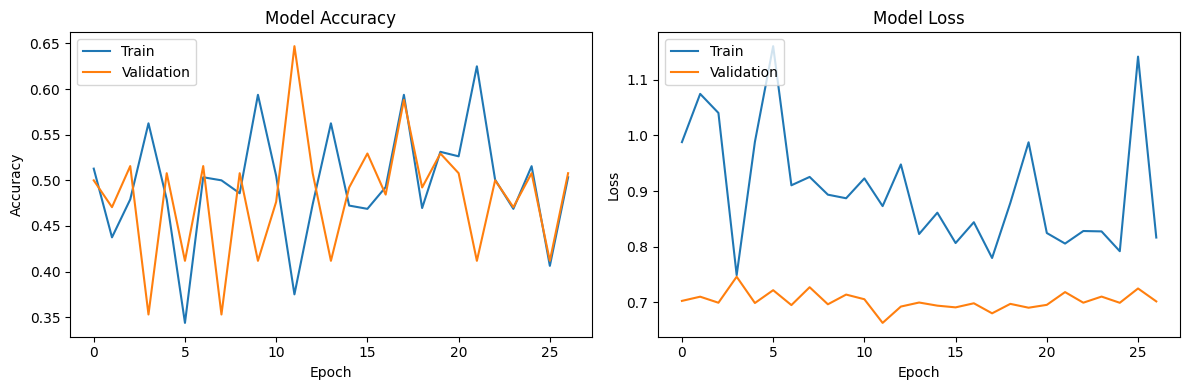

In [16]:
# Load the best model
best_model = tf.keras.models.load_model('best_model.keras')  # Changed from .h5 to .keras

# Visualize Training History
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

2/2 - 7s - 3s/step - accuracy: 0.4898 - loss: 0.7028
Test Loss: 0.7028
Test Accuracy: 0.4898
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step

Confusion Matrix:
[[24  0]
 [25  0]]

Classification Report:
              precision    recall  f1-score   support

   AI Images       0.49      1.00      0.66        24
 Real Images       0.00      0.00      0.00        25

    accuracy                           0.49        49
   macro avg       0.24      0.50      0.33        49
weighted avg       0.24      0.49      0.32        49



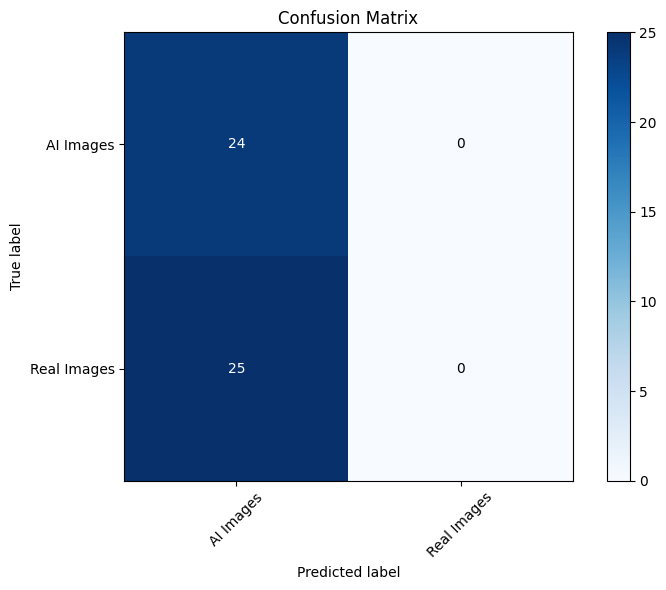

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 326ms/step


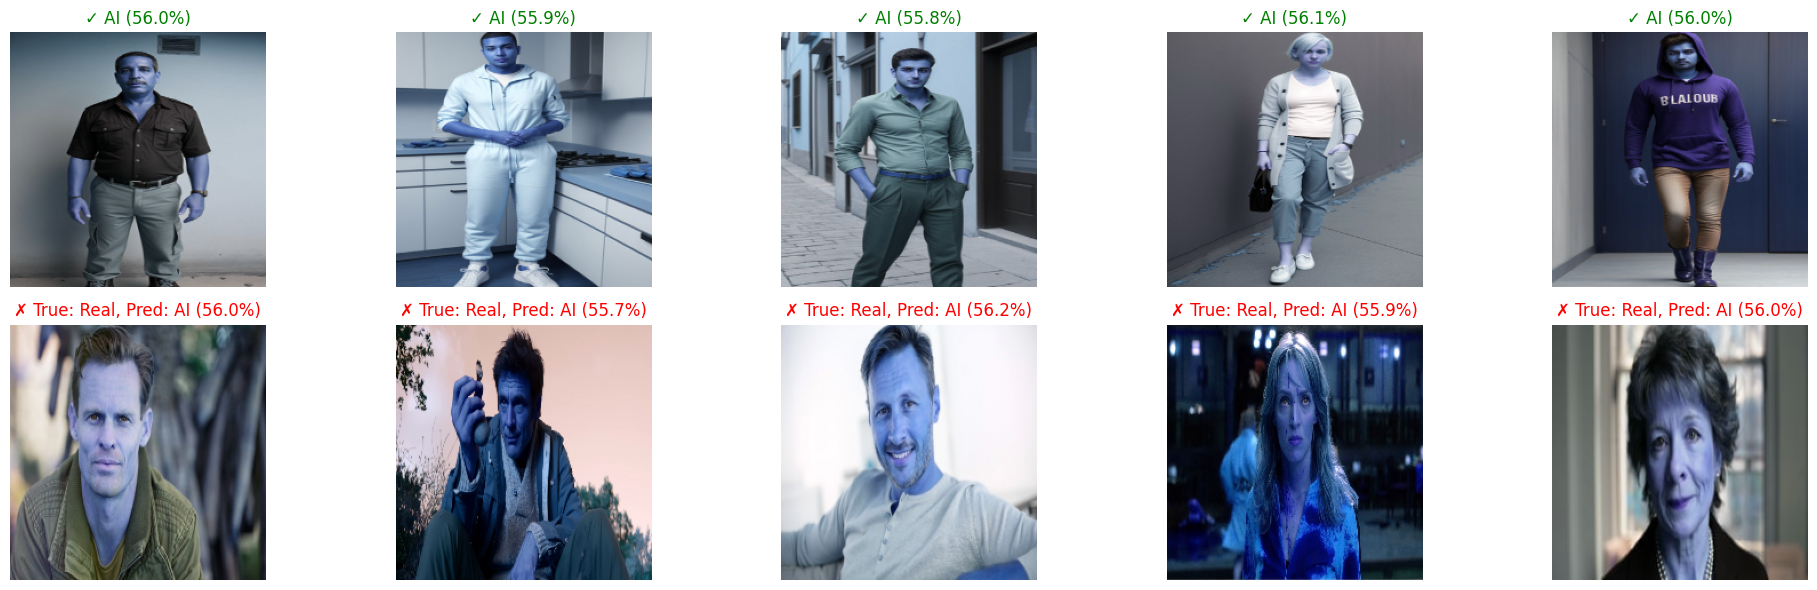

In [17]:
# Evaluate on test set
test_loss, test_acc = best_model.evaluate(test_x, test_y, verbose=2)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Generate predictions and confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

# Get predictions
y_pred = best_model.predict(test_x)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_y, axis=1)

# Print confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print("\nConfusion Matrix:")
print(cm)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, 
                          target_names=['AI Images', 'Real Images'],
                          zero_division=0))

# Plot the confusion matrix
try:
    import seaborn as sns
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['AI Images', 'Real Images'],
                yticklabels=['AI Images', 'Real Images'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    
except ImportError:
    # Fallback to matplotlib if seaborn is not available
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    
    classes = ['AI Images', 'Real Images']
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Add text annotations
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

# Visualize some predictions on test data
def plot_predictions(model, x, y_true, num_images=10):
    """Plot some test images with their predictions."""
    predictions = model.predict(x)
    pred_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(y_true, axis=1)
    
    plt.figure(figsize=(20, 6))
    
    # Find both correct and incorrect predictions
    correct_idx = np.where(pred_classes == true_classes)[0]
    incorrect_idx = np.where(pred_classes != true_classes)[0]
    
    # Determine how many of each to show
    n_correct = min(num_images // 2, len(correct_idx))
    n_incorrect = min(num_images - n_correct, len(incorrect_idx))
    
    # Plot correct predictions
    for i in range(n_correct):
        if i < len(correct_idx):
            idx = correct_idx[i]
            plt.subplot(2, num_images//2, i+1)
            plt.imshow(x[idx])
            class_name = "AI" if true_classes[idx] == 0 else "Real"
            confidence = predictions[idx][pred_classes[idx]] * 100
            plt.title(f"✓ {class_name} ({confidence:.1f}%)", color='green')
            plt.axis('off')
    
    # Plot incorrect predictions
    for i in range(n_incorrect):
        if i < len(incorrect_idx):
            idx = incorrect_idx[i]
            plt.subplot(2, num_images//2, i+n_correct+1)
            plt.imshow(x[idx])
            true_class = "AI" if true_classes[idx] == 0 else "Real"
            pred_class = "AI" if pred_classes[idx] == 0 else "Real"
            confidence = predictions[idx][pred_classes[idx]] * 100
            plt.title(f"✗ True: {true_class}, Pred: {pred_class} ({confidence:.1f}%)", color='red')
            plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Visualize a sample of predictions
plot_predictions(best_model, test_x, test_y)

In [18]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 342ms/step - accuracy: 0.4619 - loss: 0.7094
Loss = 0.7027535438537598
Test Accuracy = 0.4897959232330322


# Testing Efficient Model On Unseen data

Input image shape: (1, 224, 224, 3)


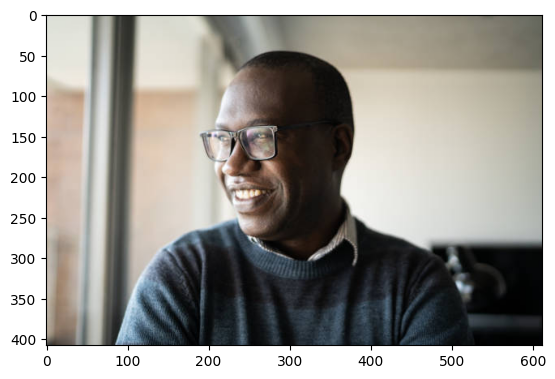

In [19]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input


img_path = 'unseen.jpg'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [20]:
preds=model.predict(x)
preds     # probabilities for being in each of the 3 classes

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


array([[0.3855248, 0.6144752]], dtype=float32)

In [21]:

# Cuda and cudnn is installed for this tensorflow version. So we can see GPU is enabled
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [22]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_performance =model.fit(train_x, train_y, epochs=30, verbose=2)
    cpu_performance

Epoch 1/30
25/25 - 33s - 1s/step - accuracy: 0.4851 - loss: 0.8619
Epoch 2/30
25/25 - 20s - 787ms/step - accuracy: 0.5045 - loss: 0.8974
Epoch 3/30
25/25 - 20s - 811ms/step - accuracy: 0.5136 - loss: 0.8359
Epoch 4/30
25/25 - 21s - 856ms/step - accuracy: 0.5006 - loss: 0.9022
Epoch 5/30
25/25 - 21s - 833ms/step - accuracy: 0.5071 - loss: 0.8289
Epoch 6/30
25/25 - 23s - 931ms/step - accuracy: 0.4916 - loss: 0.8456
Epoch 7/30
25/25 - 24s - 944ms/step - accuracy: 0.4774 - loss: 0.8466
Epoch 8/30
25/25 - 22s - 894ms/step - accuracy: 0.5149 - loss: 0.8483
Epoch 9/30
25/25 - 21s - 830ms/step - accuracy: 0.5433 - loss: 0.7661
Epoch 10/30
25/25 - 21s - 828ms/step - accuracy: 0.5162 - loss: 0.8055
Epoch 11/30
25/25 - 22s - 871ms/step - accuracy: 0.5097 - loss: 0.8230
Epoch 12/30
25/25 - 22s - 881ms/step - accuracy: 0.4942 - loss: 0.8176
Epoch 13/30
25/25 - 22s - 874ms/step - accuracy: 0.4851 - loss: 0.8315
Epoch 14/30
25/25 - 23s - 903ms/step - accuracy: 0.5239 - loss: 0.8179
Epoch 15/30
25/25 

In [ ]:

%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    gpu_performance =model.fit(train_x, train_y, epochs=30, verbose=2)
    gpu_performance

In [ ]:
# CPU completed the training in 7 min 53 Seconds and GPU did that training in 25.6 seconds